In [1]:
from importlib import reload
import utils; reload(utils)
from utils import *
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

Using cuDNN version 5105 on context None
Preallocating 2867/4095 Mb (0.700000) on cuda0
Mapped name None to device cuda0: GeForce GTX 650 (0000:01:00.0)
Using Theano backend.


In [145]:
%matplotlib inline
import os, random
from shutil import copytree
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

In [162]:
theano.config.dnn.conv.precision = 'float32'
print(theano.config.dnn.conv.precision)

float32


In [147]:
#for i in range(5):
#    patches1 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches1/"))
#    patches0 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches0/"))
#    try:
#        copytree(data_path + 'patches1/' + patches1, '/Volumes/Backups/data/LUNA16/patches/sample2/patches1/' + patches1)
#    except FileExistsError:
#        continue
#    try:
#        copytree(data_path + 'patches0/' + patches0, '/Volumes/Backups/data/LUNA16/patches/sample2/patches0/' + patches0)
#    except FileExistsError:
#        continue

In [148]:
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
import pandas as pd
from vgg16bn import Vgg16BN

In [149]:
model = vgg_ft_bn(2)

/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_3 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


GraphToGPU convolution2d_48_W convolution2d_48_W
GraphToGPU convolution2d_49_W convolution2d_49_W
GraphToGPU convolution2d_50_W convolution2d_50_W
GraphToGPU convolution2d_51_W convolution2d_51_W
GraphToGPU convolution2d_52_W convolution2d_52_W
GraphToGPU convolution2d_53_W convolution2d_53_W
GraphToGPU convolution2d_54_W convolution2d_54_W
GraphToGPU convolution2d_55_W convolution2d_55_W
GraphToGPU convolution2d_56_W convolution2d_56_W
GraphToGPU convolution2d_57_W convolution2d_57_W
GraphToGPU convolution2d_58_W convolution2d_58_W
GraphToGPU convolution2d_59_W convolution2d_59_W
GraphToGPU convolution2d_60_W convolution2d_60_W


In [150]:
from vgg16bn import Vgg16BN
model = vgg_ft_bn(2)


/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_4 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


GraphToGPU convolution2d_61_W convolution2d_61_W
GraphToGPU convolution2d_62_W convolution2d_62_W
GraphToGPU convolution2d_63_W convolution2d_63_W
GraphToGPU convolution2d_64_W convolution2d_64_W
GraphToGPU convolution2d_65_W convolution2d_65_W
GraphToGPU convolution2d_66_W convolution2d_66_W
GraphToGPU convolution2d_67_W convolution2d_67_W
GraphToGPU convolution2d_68_W convolution2d_68_W
GraphToGPU convolution2d_69_W convolution2d_69_W
GraphToGPU convolution2d_70_W convolution2d_70_W
GraphToGPU convolution2d_71_W convolution2d_71_W
GraphToGPU convolution2d_72_W convolution2d_72_W
GraphToGPU convolution2d_73_W convolution2d_73_W


In [151]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_4 (Lambda)                (None, 3, 224, 224)   0           lambda_input_4[0][0]             
____________________________________________________________________________________________________
zeropadding2d_40 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_4[0][0]                   
____________________________________________________________________________________________________
GraphToGPU Shape.0 Shape.0
GraphToGPU Shape.0 Shape.0
convolution2d_61 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_40[0][0]           
____________________________________________________________________________________________________
zeropadding2d_41 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_61[0][0]           
_____________________________________

In [152]:
model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [153]:
from skimage import color

In [154]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

In [155]:
np_img = np.zeros((1,224,224))

In [156]:
np_img


array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

In [ ]:
import glob2
from skimage import color
image_labels = []
img_array = np.zeros((1,3,224,224),dtype=np.float32)
print(type(img_array[0][0][0][0]))
i=0
#for filename in glob2.glob(data_path+'sample/*/*'):
for filename in (os.listdir(data_path + "full/")):
    print(filename)
    for image in  glob2.glob(data_path + "full/" + filename+'/*'):
        if (filename == 'patches0'):
            image_labels.append(np.int16(0.0))
            print(type(image_labels[0]))
        else:
            image_labels.append(np.int16(1.0))
        print ("imagename: " + image)
        img = color.gray2rgb(load_array(image)).astype(np.float32)
        print("img type: " + str(type(img[0][0][0])))
        np_img = np.transpose(np.asarray(img,dtype=np.float32),(2,0,1))
        print(np_img.shape)
        print("np_img type : " + str(type(np_img[0][0][0])))
        tmp_img = np.zeros((1,3,224,224),dtype=np.float32)
        print(tmp_img.shape)
        print("tmp_img type : " + str(type(tmp_img[0][0][0][0])))
        tmp_img[0] = np_img
        print("np.shape: " + str(tmp_img.shape))
        img_array = np.concatenate((img_array, tmp_img))
        print("img_array.shape :" + str(img_array.shape))
        i += 1
img_array = img_array[1:]



<class 'numpy.float32'>
patches0
<class 'numpy.int16'>
imagename: /Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439751_224x224.bc
img type: <class 'numpy.float32'>
(3, 224, 224)
np_img type : <class 'numpy.float32'>
(1, 3, 224, 224)
tmp_img type : <class 'numpy.float32'>
np.shape: (1, 3, 224, 224)
img_array.shape :(2, 3, 224, 224)
<class 'numpy.int16'>
imagename: /Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274652_224x224.bc
img type: <class 'numpy.float32'>
(3, 224, 224)
np_img type : <class 'numpy.float32'>
(1, 3, 224, 224)
tmp_img type : <class 'numpy.float32'>
np.shape: (1, 3, 224, 224)
img_array.shape :(3, 3, 224, 224)
<class 'numpy.int16'>
imagename: /Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274829_224x224.bc
img type: <class 'numpy.float32'>
(3, 224, 224)
np_img type 

In [93]:
print(type(np_img[0][0][0]))

<class 'numpy.float32'>


In [171]:
 img_array.shape

(3358, 3, 224, 224)

In [172]:
img.shape

(224, 224, 3)

In [173]:
type(img[0][0][0])

numpy.float32

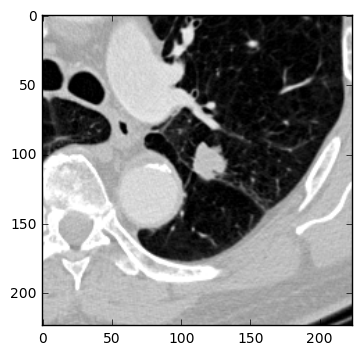

In [239]:
plt.imshow(img_array[2511][0],cmap=plt.cm.gray)

In [175]:
type(img_array[0][0][0][0])

numpy.float32

In [176]:
len(image_labels)

3358

In [177]:
type(image_labels[19])

numpy.int16

In [178]:
ohe_image_labels = to_categorical(np.array(np.float32(image_labels))).astype(np.float32)

In [193]:
sum(ohe_image_labels) # [0,1], [healthy, sick]

array([ 2007.,  1351.], dtype=float32)

In [195]:
type(ohe_image_labels[0][0])

numpy.float32

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
trn_labels, val_labels = train_test_split(ohe_image_labels, test_size=0.2, random_state=42)

In [198]:
trn,val = train_test_split(img_array, test_size=0.2, random_state=42,)

In [199]:
trn.shape

(2686, 3, 224, 224)

In [200]:
type(val[0][0][1][0])

numpy.float32

In [201]:
batch_size = 4

In [202]:
type(val[1][0][1][0])

numpy.float32

In [110]:
# model.fit(trn, 
#           trn_labels, 
#           batch_size=batch_size, 
#           nb_epoch=1, 
#           validation_data=(val, val_labels),verbose = 1)


Train on 255 samples, validate on 64 samples
Epoch 1/1
255/255 [==============================] - 40s - loss: 2.6943 - acc: 0.5176 - val_loss: 0.6939 - val_acc: 0.4844

In [111]:
# model.save_weights(data_path+'results/ft1.h5')

In [203]:
conv_layers,fc_layers = split_at(model, Convolution2D)

In [204]:
conv_layers

In [205]:
conv_model = Sequential(conv_layers)

In [206]:
%time conv_trn_feat = conv_model.predict(trn)

CPU times: user 5min 29s, sys: 4.15 s, total: 5min 33s
Wall time: 5min 37s


In [207]:
conv_trn_feat.shape

(2686, 512, 14, 14)

In [208]:
%time conv_val_feat = conv_model.predict(val)

CPU times: user 1min 23s, sys: 426 ms, total: 1min 23s
Wall time: 1min 23s


In [240]:
conv_val_feat.shape

(672, 512, 14, 14)

In [241]:
save_array(data_path+'results/conv_val_feat.dat', conv_val_feat)

In [210]:
type(conv_trn_feat[0][0][0][0])


numpy.float32

In [243]:
save_array(data_path+'results/conv_trn_feat.dat', conv_trn_feat)

## Model Training

In [244]:
conv_val_feat = load_array(data_path+'results/conv_val_feat.dat')

In [245]:
conv_val_feat.shape

(672, 512, 14, 14)

In [246]:
conv_trn_feat = load_array(data_path+'results/conv_trn_feat.dat')

In [248]:
conv_trn_feat.shape

(2686, 512, 14, 14)

In [211]:
nf=128; p=0.

In [274]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
#         Convolution2D(nf,3,3, activation='relu', border_mode='same'),
#         BatchNormalization(axis=1),
#         MaxPooling2D(),
        Convolution2D(2,3,3, border_mode='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]


In [275]:
lrg_model = Sequential(get_lrg_layers())

In [276]:
lrg_model.input_shape, lrg_model.output_shape

((None, 512, 14, 14), (None, 2))

In [277]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_43 (BatchNorm (None, 512, 14, 14)   2048        batchnormalization_input_11[0][0]
____________________________________________________________________________________________________
convolution2d_87 (Convolution2D) (None, 128, 14, 14)   589952      batchnormalization_43[0][0]      
____________________________________________________________________________________________________
batchnormalization_44 (BatchNorm (None, 128, 14, 14)   512         convolution2d_87[0][0]           
____________________________________________________________________________________________________
maxpooling2d_45 (MaxPooling2D)   (None, 128, 7, 7)     0           batchnormalization_44[0][0]      
___________________________________________________________________________________________

In [278]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [279]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=1, 
              validation_data=(conv_val_feat, val_labels))


Train on 2686 samples, validate on 672 samples
Epoch 1/1
2686/2686 [==============================] - 14s - loss: 0.6951 - acc: 0.5756 - val_loss: 0.6605 - val_acc: 0.6176 - ETA: 12s - loss: 0.6722 - acc: 0.7321

In [280]:
lrg_model.optimizer.lr = 0.0001

In [281]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
          validation_data=(conv_val_feat, val_labels))


Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 14s - loss: 0.6816 - acc: 0.5812 - val_loss: 0.6554 - val_acc: 0.6429

In [282]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 14s - loss: 0.6702 - acc: 0.6013 - val_loss: 0.6883 - val_acc: 0.5446

In [283]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 14s - loss: 0.6515 - acc: 0.6121 - val_loss: 1.3017 - val_acc: 0.6190

In [227]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 13s - loss: 0.5575 - acc: 0.7033 - val_loss: 0.7453 - val_acc: 0.6339

In [ ]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=10, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/10
2686/2686 [==============================] - 13s - loss: 0.5347 - acc: 0.7301 - val_loss: 0.7418 - val_acc: 0.6295

In [273]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(conv_val_feat, val_labels))

Train on 2686 samples, validate on 672 samples
Epoch 1/3
2686/2686 [==============================] - 13s - loss: 0.5832 - acc: 0.6757 - val_loss: 0.7371 - val_acc: 0.5551

In [ ]:
unresArr198 = load_array('/Volumes/Backups/data/unlabeled_patient_collapsed_images-198x3x224x224.bc')

In [ ]:
unlabeledPredictionvgg = lrg_model.predict(unresArr198, batch_size=8, verbose=1)

In [ ]:
#conv_feat = load_array(data_root + 'results/conv_feat.dat')
#conv_val_feat = load_array(data_root + 'results/conv_val_feat.dat')

In [165]:
theano.config.optimizer_verbose = False
print(theano.config.optimizer_verbose)

False


In [167]:
len(img_array)

3358

In [257]:
!git add .

In [260]:
!git commit -m "2 conv layer model"

[master baa89ed] 2 conv layer model
 3 files changed, 63885 insertions(+), 109 deletions(-)
 create mode 100644 cnnvggF.ipynb


In [261]:
!git push origin master

X11 forwarding request failed on channel 0
Counting objects: 5, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 352.63 KiB | 0 bytes/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 1 local objects.
To git@github.com:ungsur/luna16.git
   b40a4e7..baa89ed  master -> master
